### Emergence of COVID-19
In December 2019, a new virus (initially called ‘Novel Coronavirus 2019-nCoV’ and later renamed to SARS-CoV-2) causing severe acute respiratory syndrome (coronavirus disease COVID-19) emerged in **Wuhan, Hubei Province, China**, and rapidly spread to other parts of China and other countries around the world, despite China’s massive efforts to contain the disease within Hubei.

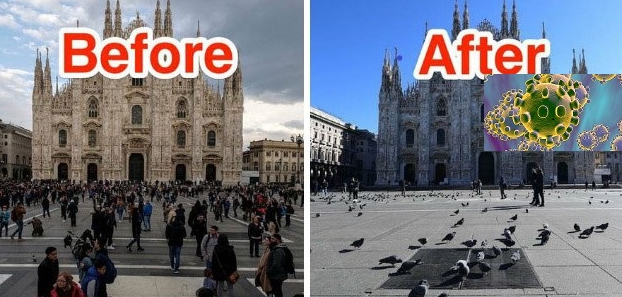

#### Countries with highest number of cases

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
import matplotlib as mpl
import plotly.graph_objects as go
sns.set_style("whitegrid")
#sns.set()

#Bokeh Libraries
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.plotting import reset_output 
from bokeh.models import ColumnDataSource
from datetime import datetime as dt
import warnings 
warnings.filterwarnings('ignore')
df = pd.read_csv("../input/corona-virus-report/covid_19_clean_complete.csv",parse_dates=['Date'])
df_World = pd.read_csv("../input/latitude-and-longitude-for-every-country-and-state/world_country_and_usa_states_latitude_and_longitude_values.csv")
df_Countries = pd.read_csv("../input/countries-lat-long/Countries_lat_long.csv")
df_fdate = pd.read_csv("../input/covid19geographicdisbtributionworldwide/COVID-19-geographic-disbtribution-worldwide.csv",parse_dates=['dateRep'])
df_zonal = pd.read_csv("../input/feb-zonal-means/zonalmean.csv")
df_us = pd.read_csv("../input/us-states-covid19/us_states.csv", parse_dates=['date'])
df.rename(columns=({'Country/Region':'Country'}),inplace=True)
df['Country'].replace(['US'], 'United States',inplace=True)
df['Country'].replace(['Korea, South'], 'South Korea',inplace=True)
maxdate = (pd.to_datetime(df['Date'].max()).date()).strftime("%b %d %Y")
musdate = (pd.to_datetime(df_us['date'].max()).date()).strftime("%b %d %Y")
fdate = (pd.to_datetime(df_fdate['dateRep'].max()).date()).strftime("%b %d %Y")
df_mdate = df[df['Date'] == np.max(df['Date'])].loc[:,['Country','Confirmed','Deaths','Recovered']]
df_mdate = df_mdate.groupby(['Country'],as_index=False)['Confirmed','Deaths','Recovered'].sum().sort_values('Confirmed',ascending=False).head(15)
df_mdate['Mortality'] = np.round((df_mdate['Deaths']/df_mdate['Confirmed'])*100,2)
df_mdate = df_mdate.merge(df_Countries,left_on='Country', right_on='name')
dfw =df_fdate.groupby(['countriesAndTerritories','countryterritoryCode'], as_index=False)['cases','deaths'].sum()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations = dfw['countryterritoryCode'],
    z = dfw["cases"],
    text = dfw["countriesAndTerritories"],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    #colorbar_tickprefix = '$',
    colorbar_title = 'Confirmed Cases',
))
fig.update_layout(
    title_text='Geographical Spread of COVID-19 as of ' + fdate,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        #showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        #showrivers=True, rivercolor="Blue",
        #lakecolor='rgb(255, 255, 255)',
        projection_type='equirectangular'
    )
)
fig.show()

In [ ]:
lat = df_mdate['latitude'].values
lon = df_mdate['longitude'].values
conf = df_mdate['Confirmed'].values
deaths = df_mdate['Deaths'].values
coun = df_mdate['Country'].values
dict1={}
list1=[]
list2=[]
list3=[]
n=0
#storing each value in different lists
for z in lat:
    list1.append(z)
for u in lon:
    list2.append(u)
for c in coun:
    list3.append(c)
#storing the values of lat long in a dictionary with lat as keys and long as values    
while(n<len(list1)):
    dict1[list1[n]]=list2[n]
    n+=1
fig = plt.figure(figsize=(12,9))#edgecolor='w'
m = Basemap(projection='mill', 
           llcrnrlat = -70,
           urcrnrlat=90,
           llcrnrlon=-180,
           urcrnrlon=180,
           resolution='l')
m.drawcoastlines()
m.drawcountries(color='black')
m.drawmapboundary(fill_color='#dff7f0')
m.fillcontinents(color='lightgreen', lake_color='aqua',zorder=1)
m.drawparallels(np.arange(-90,90,10), labels=[True,True,False,False])
i=0
for z,c in dict1.items():
    x,y = m(c, z)
    plt.plot(x, y, 'ro', markersize=10)
    plt.text(x, y,list3[i], fontsize=8, weight='bold')
    i+=1
plt.title(" Top 15 Countries-Confirmed Cases as of  " +maxdate,fontsize=20)
plt.show()

### Number of Confirmed cases of Covid-19
Southern Hemisphere
The Southern Hemisphere is relatively not that affected. None of the top 15 countries are in SH.

Northern Hemisphere
All the top 15 Countries are in Northern Hemisphere. 
All of them are between 30N and 60N latitudes. 
And most of them lie between -30 degree and +30 degree Longtitudes

#### Zooming to 30N to 60N Latitudes

In [ ]:
fig = plt.figure(figsize=(14,12))
m= Basemap(projection='mill',resolution='l',
          llcrnrlat = 20,
          urcrnrlat=70,
          llcrnrlon=-160,
          urcrnrlon=160)
m.drawmapboundary(color='black', linewidth = 2,fill_color='#ebf0f7')
m.fillcontinents(color='#dbc59e', lake_color='aqua',zorder=1)
m.drawcoastlines()
m.drawcountries(color='#0c2240')
m.drawparallels(np.arange(20,72,10),labels=[1,1,0,0])
m.scatter(lon, lat, latlon=True,
          s=deaths/10, c='Red',
          alpha=1, zorder=2)
plt.title("Top 15 Countries - Deaths as of "+maxdate,fontsize=20)
plt.show()

#### Deaths due to COVID-19

* Most of the deaths are concentrated between -30 degrees and +30 degrees Longitudes.
* Most of them are also between 30N and 60N Latitudes
Geographically Longtitude and specifically Latitude does seem effect the spread of COVID-19.

##### Lets analyze and see where it started and how it spread across the World.


In [ ]:
idx = df_fdate[df_fdate['cases']>0].groupby(['countriesAndTerritories'])['dateRep'].idxmin()
df_fd = df_fdate.loc[idx].sort_values('dateRep').head(15)
df_fd['countriesAndTerritories'].replace(['United_States_of_America'],'United States',inplace=True)
df_fd['countriesAndTerritories'].replace(['South_Korea'],'South Korea',inplace=True)
df_fd['countriesAndTerritories'].replace(['United_Arab_Emirates'],'United Arab Emirates',inplace=True)
df_fd = df_fd.merge(df_Countries, left_on = 'countriesAndTerritories', right_on= 'name')
df_fdll = df_fd[['dateRep','cases','deaths','name','latitude','longitude']].head(10)
slat = df_fdll['latitude'].values
slon = df_fdll['longitude'].values
latl=[]
lonl=[]
for lt in slat:
    latl.append(lt)
for ln in slon:
    lonl.append(ln)

In [ ]:
fig = plt.figure(figsize=(10,10))
width = 28000000; lon_0 = -104; lat_0 = 40
m = Basemap(width=width,height=width,projection='aeqd',
             lat_0=lat_0,lon_0=lon_0)
m.drawmapboundary(fill_color='gray')
m.fillcontinents(color='black', alpha=1, lake_color='aqua')
m.drawcoastlines(linewidth=0.1, color="white")
# 20 degree graticule.
m.drawparallels(np.arange(-80,81,20))
m.drawmeridians(np.arange(-180,180,20))
# draw a black dot at the center.
xpt, ypt = m(104.19,35.86)
m.plot(xpt,ypt,'ro',color='red',markersize=12)
m.scatter(slon, slat, latlon=True,
          s=14, c='red',
          alpha=1, zorder=2)
for i in range(len(latl)-1):
    startlat = latl[i]
    startlon = lonl[i]
    arrlat = latl[i+1]
    arrlon = lonl[i+1]
    m.drawgreatcircle(startlon,startlat,arrlon,arrlat, linewidth=2, color='orange')
#draw the title.
plt.title('Covid19 Spread starting from China')
plt.show()

First started in Wuhan, Hubei Province, China and mostly spread westward to other countries that lie between 30N and 60N Latitudes.

In [ ]:
df1 = df_mdate.head(10)
df1['latitude'] = df1['latitude'].astype(int)
df1 = df1[['latitude','Confirmed','Deaths','Recovered']]
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = [12.0, 6.0]
mpl.rc('lines', linewidth=2, linestyle='-')
parallel_coordinates(df1, 'latitude', colormap=plt.get_cmap("Dark2"))
plt.xlabel("Cases")
plt.ylabel("Counts")
plt.title("Counts based on Latitudes")
plt.show()

In [ ]:
source = ColumnDataSource(df_mdate)
#ymin, ymax = min(df_20f.Confirmed), max(df_20f.Confirmed)
output_notebook()

fig = figure(plot_height=300, plot_width=600,
             title='Confirmed Cases Count based on Latitudes',
             x_axis_label='Latitude', y_axis_label='Count',
             toolbar_location=None, tools="hover", tooltips=[('Country', '@Country')])
# Render the race as step lines
fig.vbar(x='latitude',top='Confirmed',width =0.9,
         color='#CE1141',  
         source=source)
show(fig)

From the Graphs we can see most of the Confirmed case are Latitude 37N -which is the US and the range is between 30N to 60N. and deaths are more along latitude 41N.

### US COVID-19 analysis

In [ ]:
df_us = df_us[df_us['date']==df_us['date'].max()]
df_usll = df_us.merge(df_World,left_on = 'state', right_on = 'usa_state')
df_usll = df_usll[['state','cases','deaths','usa_state_code','usa_state_latitude','usa_state_longitude']]
df_usf=df_usll.rename(columns=({'usa_state_code':'code','usa_state_latitude':'lat','usa_state_longitude':'lon'}))
df_usf['lat'] = df_usf['lat'].astype(int)
df_usf = df_usf.sort_values('cases',ascending=False).head(12)
df_usf['mortality'] = np.round((df_usf['deaths']/df_usf['cases'])*100,2)

In [ ]:
fig = px.choropleth(df_usf, 
                    locations="code", 
                    color="cases", 
                    locationmode = 'USA-states', 
                    hover_name="state",
                    range_color=[0,50],scope="usa",
                    title='US COVID-19 cases as of ' +musdate)

fig.show()

fig = px.choropleth(df_usf, 
                    locations="code", 
                    color="mortality", 
                    locationmode = 'USA-states', 
                    hover_name="state",
                    range_color=[0,50],scope="usa",
                    title='US Mortality Rate  as of '+musdate)
fig.show()

In [ ]:
source = ColumnDataSource(df_usf)
#ymin, ymax = min(df_20f.Confirmed), max(df_20f.Confirmed)

output_notebook()

fig = figure(plot_height=300, plot_width=600,
             title='Confirmed Cases Count based on Latitudes',
             x_axis_label='Latitude', y_axis_label='Count',
             toolbar_location=None, tools="hover", tooltips=[('State', '@state')])
# Render the race as step lines
fig.vbar(x='lat',top='cases',width =0.9,
         color='#CE1141', alpha=0.5,
         source=source)
show(fig)
#legend='Confirmed',
#fig.vbar(x='Country',top='Confirmed', width=0.9, color='color',source=source)

# Move the legend to the upper left corner
#fig.legend.location = 'top_right'

# Show the plot
fig = figure(plot_height=300, plot_width=600,
             title='Mortality Rate based on Latitudes',
             x_axis_label='Latitude', y_axis_label='Count',
             toolbar_location=None, tools="hover", tooltips=[('State', '@state')])
# Render the race as step lines
fig.vbar(x='lat',top='mortality',width =0.9,
         color='#CE1141', alpha=0.5,
         source=source)
show(fig)

Coastal states with more populations seem to be  more affected. The whole of US falls within the 30N to 60N except Alaska. Confirmed Cases at 43N are the most.

### Geography and climate
In the sixth century BC, the Greek philosopher Pythagoras recognised the sphericity of the Earth and the dominance of latitude in explaining climate variation (Sanderson 1999). Two centuries later Aristotle expanded on Pythagoras's foundation and introduced five climate zones, ranging from tropical to northern frigid.

**hemisphere** - which leads to warmer conditions, or, in the Tropics (23.5� S-23.5� N), to wetter conditions, in either January (south) or July (north);
**latitude** - which affects a) the annual mean temperature, b) the annual range, c) the annual total rainfall (which is least around the Tropics and near the poles), d) the prevailing wind direction and strength;
**elevation** - which affects a) the annual mean temperature, b) precipitation, and c) the daily range of temperature;
**distance inland** - the annual temperature range increases with the distance downwind of the coast, and at all latitudes but the equatorial belt (5� S-5� N) the climate is drier and more rain falls in summer;
**sea surface temperature upwind** - anomalously high SSTs (for a given latitude) means warmth and rain onshore - conversely, upwelling or cold water advection stabilises the atmosphere and inhibits rainfall;
**upwind topography** - an upwind mountain chain implies drier conditions, but also colder winters, because of easy advection of polar airmasses along the mountain chain;
local topography - e.g. low daily minima in broad valleys, but higher ones in urban canyons; or reduced daily maxima near large bodies of water on account of a lake breeze.

#### Zonal Mean Temperatues Trend in February


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_zonal['lat'], y=df_zonal['temp_anom'],
                    mode='lines+markers',
                    name='lines+markers',
                    line_color = 'black',
                    marker_color='rgba(152, 0, 0, .8)'))

# Edit the layout
fig.update_layout(title='Zonal February Temp Change 2019-2020',
                   xaxis_title='Latitude',
                   yaxis_title='Zonal Mean(C)')
fig.show()

In [ ]:
df_tp = pd.read_csv("../input/cities-temp-prec/city_temp_prec.csv", encoding='latin-1')
new_cols = [col.strip() for col in df_tp.columns]#"\xa0"some headers which end with no break space hex code
df_tp.columns = new_cols
#Temperature dataframe
df_temp = df_tp[~df_tp['Elev'].isna()]
df_temp1 = df_temp[(df_temp['City'] == 'New York') | (df_temp['City'] == 'Rome') | (df_temp['City'] == 'Madrid') |
        (df_temp['City'] =='Berlin') | (df_temp['City'] =='Paris') | (df_temp['City'] =='Wuhan') |
        (df_temp['City'] =='Tehran') | (df_temp['City'] =='London')]
df_tmp = df_temp1.T
df_tmp.columns = df_tmp.loc['City'] #Assign row as column headers.
df_tmp = df_tmp. drop(['City','ANNUAL','Elev']) #Drop header row.
df_tmp.columns.name=None
cols = df_tmp.columns.to_list()
colors = ['firebrick','royalblue','purple','brown','yellow','orange','green','black']
x = df_tmp.index.values
fig = go.Figure()
for i,col in enumerate(cols):
    fig.add_trace(go.Scatter(x=x, y=df_tmp[col].values, name = col,
                         line=dict(color=colors[i-1], width=2)))
fig.update_layout(title='Monthly  Average Temperatures of 8 affected cities ',
                    xaxis_title='Month',
                    yaxis_title='Temperature (degrees F)')      
fig.show()
df_prec = df_tp[df_tp['Elev'].isna()]
df_prec = df_prec.drop(['Elev','ANNUAL'],axis =1)
df_prec1 = df_prec[(df_prec['City'] == 'New York') | (df_prec['City'] == 'Rome') | (df_prec['City'] == 'Madrid') |
          (df_prec['City'] =='Berlin') | (df_prec['City'] =='Paris') | (df_prec['City'] =='Wuhan') |
          (df_prec['City'] =='Tehran') | (df_prec['City'] =='London')]
df_prc = df_prec1.T
df_prc.columns = df_prc.loc['City'] #Assign row as column headers.
df_prc = df_prc. drop('City') #Drop header row.
df_prc.columns.name=None
x = df_prc.index.values
fig = go.Figure()
for i,col in enumerate(cols):
    fig.add_trace(go.Scatter(x=x, y=df_prc[col].values, name = col,
                         line=dict(color=colors[i-1], width=2)))
fig.update_layout(title='Monthly Average Precipitaions of 8 affected cities ',
                    xaxis_title='Month',
                    yaxis_title='Precipitaion (in)')  
fig.show()

In [ ]:
dfai = df[df['Date'] == np.max(df['Date'])].loc[:,['Country','Confirmed','Deaths','Recovered']]
dff = dfai.groupby(['Country'], as_index=False)['Confirmed','Deaths','Recovered'].sum().sort_values('Confirmed',ascending=False)
dff = dff.merge(df_Countries,left_on='Country', right_on='name')
dfwtp = pd.read_csv("../input/world-temp-prec/tpw.csv")
dfwtpt = dfwtp[dfwtp['units'] == 'F'].loc[:,['Country','JAN','FEB','MAR','APR','MAY','Corona']]
dfwtpt['Corona'] = dfwtpt['Corona'].astype(int)
dff = dff[['Country','Confirmed','latitude']]
dffa = dfwtpt.merge(dff, right_on='Country', left_on='Country')
X = dffa[['JAN','FEB','MAR','APR','MAY','Confirmed','latitude']]
y = dffa['Corona']
df_us = df_us[df_us['date']==df_us['date'].max()]
df_usll = df_us.merge(df_World,left_on = 'state', right_on = 'usa_state')
df_uslla = df_usll[['state','cases','usa_state_latitude']]
df_tpa = pd.read_csv("../input/state-temp-prec/tps.csv")
df_tpa = df_tpa[df_tpa['unit'] =='F'].loc[:,['state','Jan','Feb','Mar','Apr','May']]
df_tpa = df_tpa.merge(df_uslla, right_on='state', left_on = 'state')
X_test = df_tpa.drop(['state'],axis=1)
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X,y)
y_pred=logreg.predict(X_test)
X_test['cor'] =pd.Series(y_pred)
X_test['state'] = df_tpa['state']
df_final = X_test[X_test['cor'] == 1]
fig = px.bar(df_final, x="cases", y="state", orientation='h')
fig.update_layout(title='States in US prdeicted to get Corona ')   
fig.show()

### Conclusion

The equator always faces the sun directly. The Equator is the line of 0 degrees latitude. As latitude increases, the sun shines more obliquely and provides less warming energy. Latitudes seem to affect the spread of COVID-19. Countries most affected by this virus lie between Tropic of Cancer 23.5N and 60N Latitudes.
In turn latitude - affects a) the annual mean temperature, b) the annual range, c) the annual total rainfall (which is least around the Tropics and near the poles), d) the prevailing wind direction and strength.
From graphs above the cities most affected follow the same average mean temperatures patterns throughout the year. In Jan, Feb they are between 30F and 47F.
Average precipitaions for the cities are all different.
From the data we can argue that coastal places are more prone to this virus.
Using mean temperatures, number of cases, latitudes as features, predicted the cities that are prone to get this virus in US. Will have to see if Elevation, population also effect the geographical spread of this virus.

